Notebook used for blog post found here: http://vknight.org/unpeudemath/python/2016/08/13/Analysis-of-variance-with-different-sized-sample.html

In [27]:
# Create some random data

import random
random.seed(0)
data = [[random.randint(1, 20) for _ in range(size)] for size in range(1, 5)]
for sample in data:
    print(sample)

[13]
[14, 2]
[9, 17, 16]
[13, 10, 16, 12]


In [29]:
# Carry out anova

from scipy import stats
f_val, p_val = stats.f_oneway(*data)
p_val

0.57172146848075944

In [30]:
# Data might not be in that nice format. Could be in a dataframe as below.

import pandas as pd
dfs = [pd.DataFrame({k: sample}) for k, sample in enumerate(data)]
df = pd.concat(dfs,  ignore_index=True, axis=1)
df

,0,1,2,3
0,13.0,14.0,9.0,13
1,NaN,2.0,17.0,10
2,NaN,NaN,16.0,16
3,NaN,NaN,NaN,12


In [31]:
# Now the basic anova fails (because of nan)

data = [df[col] for col in df]
f_val, p_val = stats.f_oneway(*[df[col] for col in df])
p_val

nan

In [38]:
# This is how to deal with the nans

data = [df[col].dropna() for col in df]
f_val, p_val = stats.f_oneway(*data)
p_val

0.57172146848075944

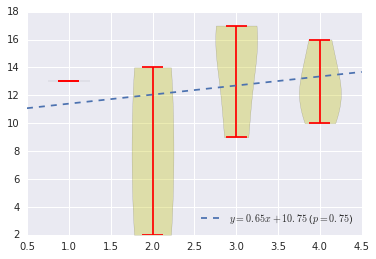

In [41]:
# Let us create a nice plot with a regression line fitted to the median of the samples

import numpy as np  # For the median
import matplotlib.pyplot as plt  # For the plot
import seaborn
%matplotlib inline

# Fit line to median of distributions
x = range(1, len(data) + 1)
y = [np.median(sample) for sample in data]
slope, intercept, r_val, p_val, slope_std_error = stats.linregress(x, y)

def line(x):
    """The regression line"""
    return slope * x + intercept

plt.figure()
plt.violinplot(data);
x1, x2 = plt.xlim()
plt.plot((x1, x2), (line(x1), line(x2)), '--',
         label="$y = {:.2f}x + {:.2f}$ ($p={:.2f}$)".format(slope, intercept, p_val),
         ),
plt.legend(loc=4);
# plt.savefig("../assets/images/regression_anova.svg");  # Save to your path